In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
pd.set_option('float_format', '{:.2f}'.format)

In [137]:
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
train = pd.read_csv('train.csv')

In [138]:
display(stores.head())
display(features.head())
display(train.head())

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False
1,1,2010-02-12,38.51,2.55,NaN,NaN,NaN,NaN,NaN,211.24,8.11,True
2,1,2010-02-19,39.93,2.51,NaN,NaN,NaN,NaN,NaN,211.29,8.11,False
3,1,2010-02-26,46.63,2.56,NaN,NaN,NaN,NaN,NaN,211.32,8.11,False
4,1,2010-03-05,46.50,2.62,NaN,NaN,NaN,NaN,NaN,211.35,8.11,False


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## Concatenando as bases de dados

In [139]:
df = stores.merge(features, on='Store')


In [140]:
df = df.merge(train, on=['Store', 'Date', 'IsHoliday'])

In [141]:
df.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,5,32229.38


## Fazendo o EDA

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [143]:
df.duplicated().sum()

0

In [144]:
df.describe()

,Store,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
count,421570.00,421570.00,421570.00,421570.00,150681.00,111248.00,137091.00,134967.00,151432.00,421570.00,421570.00,421570.00,421570.00
mean,22.20,136727.92,60.09,3.36,7246.42,3334.63,1439.42,3383.17,4628.98,171.20,7.96,44.26,15981.26
std,12.79,60980.58,18.45,0.46,8291.22,9475.36,9623.08,6292.38,5962.89,39.16,1.86,30.49,22711.18
min,1.00,34875.00,-2.06,2.47,0.27,-265.76,-29.10,0.22,135.16,126.06,3.88,1.00,-4988.94
25%,11.00,93638.00,46.68,2.93,2240.27,41.60,5.08,504.22,1878.44,132.02,6.89,18.00,2079.65
50%,22.00,140167.00,62.09,3.45,5347.45,192.00,24.60,1481.31,3359.45,182.32,7.87,37.00,7612.03
75%,33.00,202505.00,74.28,3.74,9210.90,1926.94,103.99,3595.04,5563.80,212.42,8.57,74.00,20205.85
max,45.00,219622.00,100.14,4.47,88646.76,104519.54,141630.61,67474.85,108519.28,227.23,14.31,99.00,693099.36


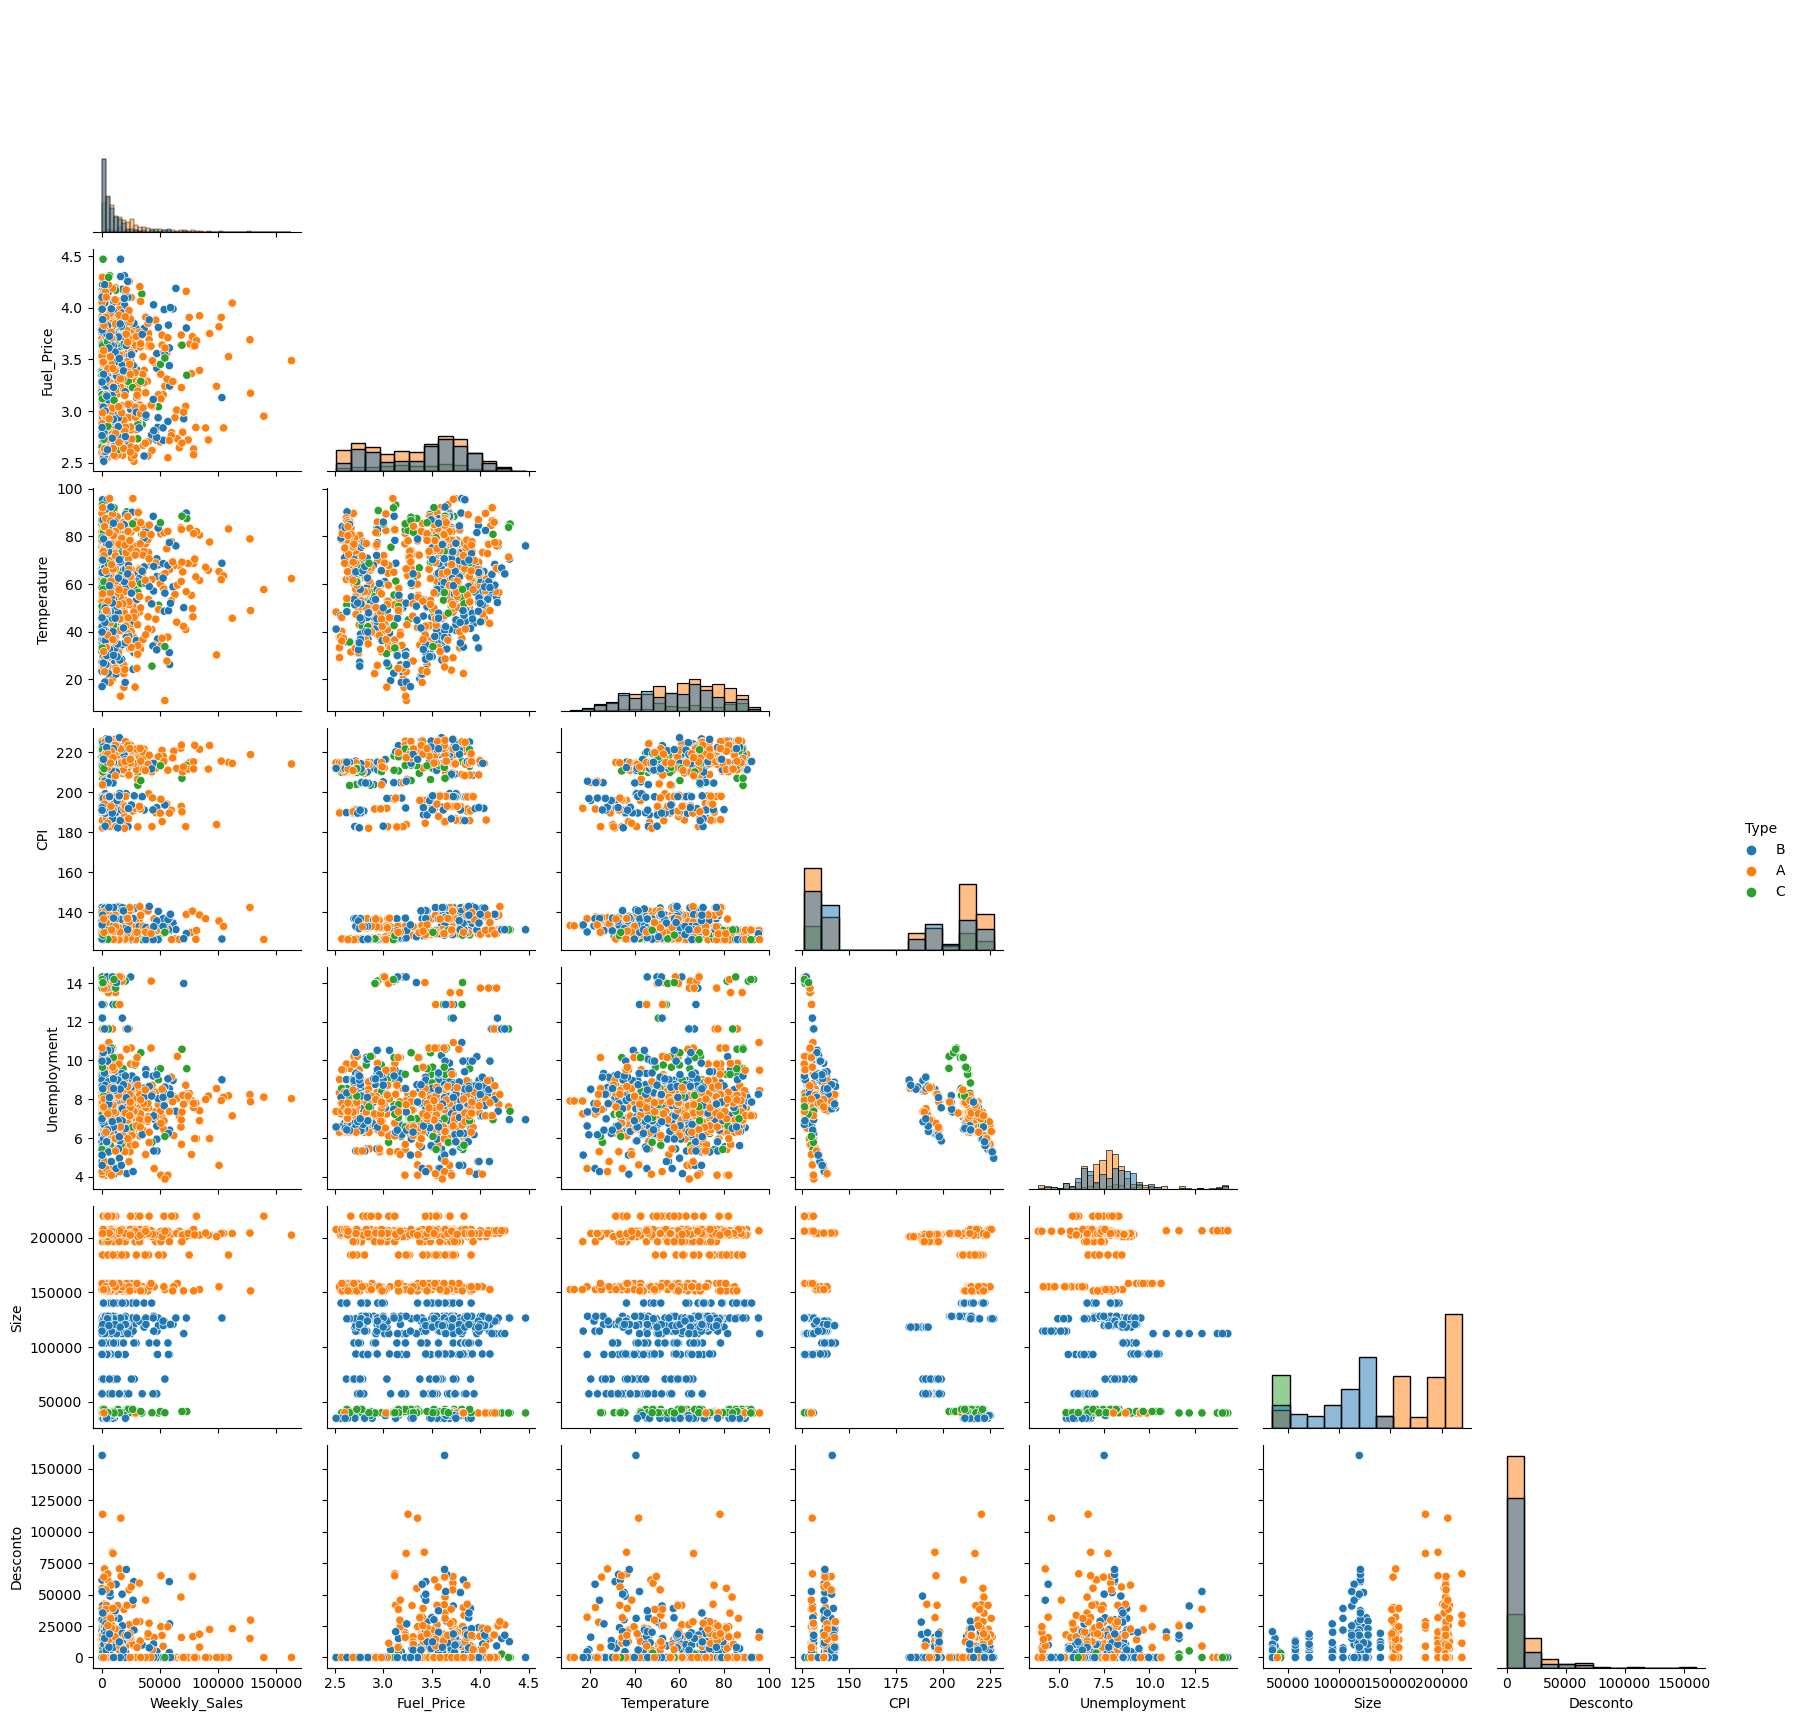

In [145]:
sample_plot = df.sample(1000)
sample_plot['Desconto'] = (sample_plot['MarkDown1'] 
                           + sample_plot['MarkDown2'] 
                           + sample_plot['MarkDown3'] 
                           + sample_plot['MarkDown4'] 
                           + sample_plot['MarkDown5'])

cols_pp = ['Weekly_Sales',
           'Fuel_Price',
           'Temperature',
           'CPI',
           'Unemployment',
           'Size',
           'Desconto',
           'Type']


sample_plot = sample_plot[cols_pp].fillna(0)
sns.pairplot(sample_plot,
             hue = 'Type',
             diag_kind="hist",
             corner=True
) 

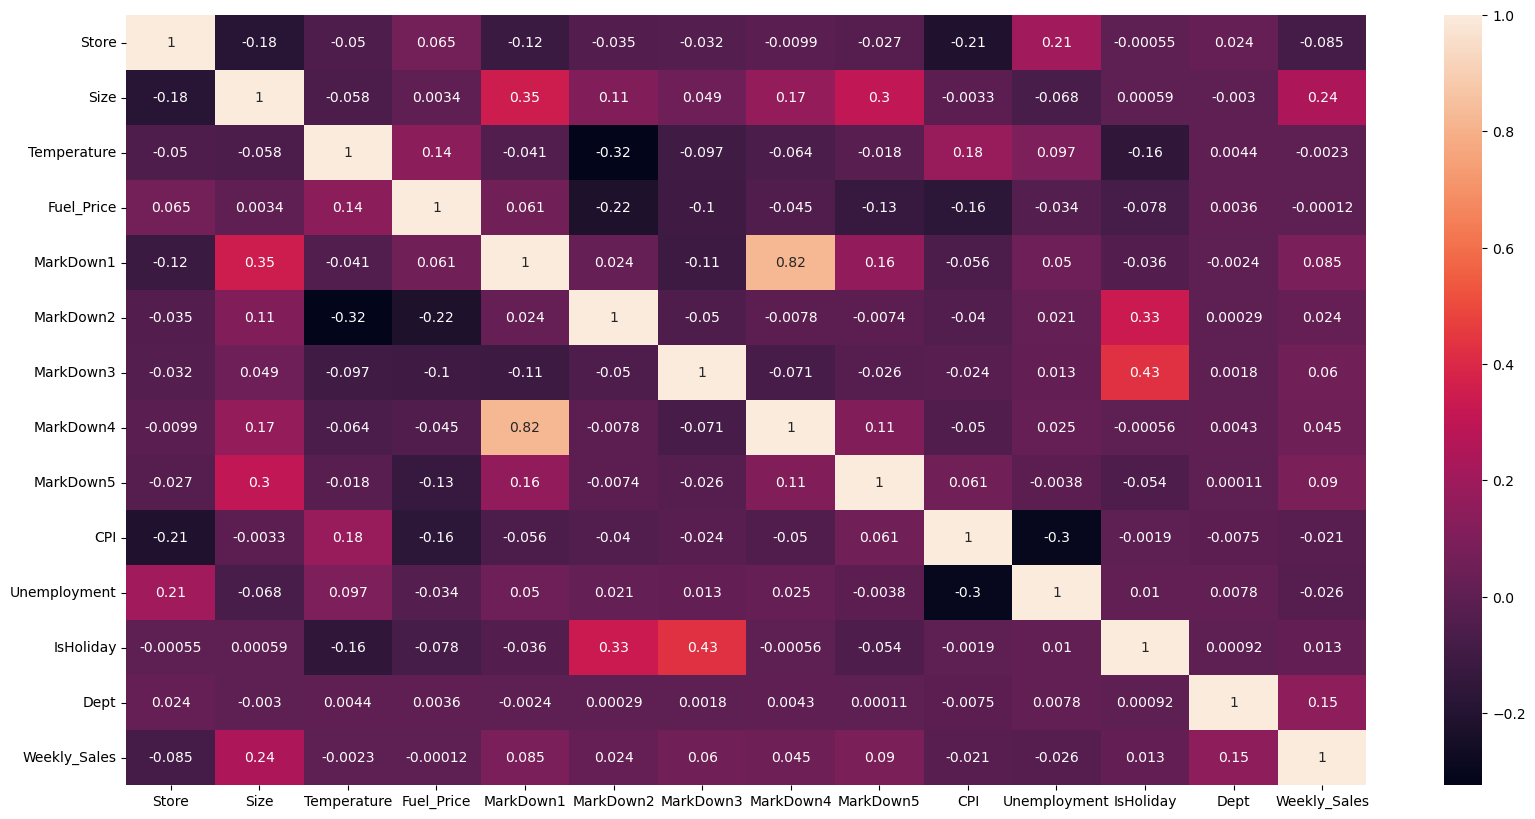

In [146]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(20, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

#### Não foram encontradas correlações fortes das colunas explicativas com a target, e também não existe colinearidades entre as variáveis explicativas.

# Tratamento dos dados

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [149]:
## Transformando a coluna Date para o tipo datetime
df.Date = pd.to_datetime(df.Date)

In [150]:
## Transformando a coluna IsHoliday para o tipo int
df.IsHoliday = df.IsHoliday*1

In [151]:
'''
Tranformando valores nulos em 0, visto que quando nas colunas "MarkDown" nulo é igual a "Sem promoção"
'''
df = df.fillna(0)

In [152]:
## Ultilização do método One Hot Enconding
df = pd.get_dummies(df, columns=['Store', 'Type', 'Dept'])

In [153]:
df = df.set_index('Date', drop=True)

In [154]:
df.head()

,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,151315,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,...,0,0,0,0,0,0,0,0,0,0
2010-02-05,151315,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,...,0,0,0,0,0,0,0,0,0,0
2010-02-05,151315,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,...,0,0,0,0,0,0,0,0,0,0
2010-02-05,151315,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,...,0,0,0,0,0,0,0,0,0,0
2010-02-05,151315,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,...,0,0,0,0,0,0,0,0,0,0


# Teste para seleção do melhor modelo

### 1.Separação da massa de dados em treino e teste

In [155]:
# Criando uma amostra para otimizar o teste de modelos e encontrar o melhor entre eles
amostra = df.sample(10000, random_state=0)

In [156]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [157]:
X = amostra.drop('Weekly_Sales', axis=1)
Y = amostra[['Weekly_Sales']]

In [158]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

### 2.Padronização dos dados

In [159]:
from sklearn.preprocessing import MinMaxScaler

In [160]:
''' 
selecionando as colunas necessárias para a padronização, features dummificadas não passarão pela 
transformação.
'''
colunas = []
for coluna in list(x_train.columns):
    if 'Store' in coluna:
        continue
    elif 'Type' in coluna:
        continue
    elif 'Dept' in coluna:
        continue
    elif 'IsHoliday' in coluna:
        continue
    else:
        colunas.append(coluna)

In [161]:
scaler = MinMaxScaler()

In [162]:
'''
O padronização será feita baseada nos dados de treino, para diminuir a chance de overfitting
'''
scaler.fit(x_train[colunas])

MinMaxScaler()

In [163]:
x_train[colunas] = scaler.transform(x_train[colunas])

In [164]:
x_train

,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-16,0.67,0.77,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.57,...,0,0,0,0,0,1,0,0,0,0
2012-06-08,0.92,0.62,0.69,0.15,0.01,0.00,0.03,0.07,0.16,0.42,...,0,0,0,0,0,0,0,0,0,0
2010-09-24,1.00,0.66,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.39,...,0,0,0,0,0,0,0,0,0,0
2010-07-30,0.91,0.80,0.06,0.00,0.00,0.00,0.00,0.00,0.86,0.30,...,0,0,0,0,0,0,0,0,0,0
2011-07-08,0.43,0.68,0.65,0.00,0.00,0.00,0.00,0.00,0.09,0.07,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-10-14,0.03,0.75,0.61,0.00,0.00,0.00,0.00,0.00,0.04,0.40,...,0,0,0,0,0,0,0,0,0,0
2010-09-10,0.03,0.79,0.03,0.00,0.00,0.00,0.00,0.00,0.83,0.43,...,0,0,0,0,0,1,0,0,0,0
2011-11-18,0.93,0.47,0.40,0.05,0.01,0.00,0.01,0.05,0.04,0.12,...,0,0,0,0,0,1,0,0,0,0


In [165]:
## padronizando os valores de x_test
x_test[colunas] = scaler.transform(x_test[colunas])

In [166]:
x_test

,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-19,0.32,0.43,0.16,0.00,0.00,0.00,0.00,0.00,0.06,0.59,...,0,0,1,0,0,0,0,0,0,0
2010-11-26,0.03,0.66,0.11,0.00,0.00,0.00,0.00,0.00,0.83,0.44,...,0,0,0,0,0,0,0,0,0,0
2010-06-18,0.32,0.65,0.15,0.00,0.00,0.00,0.00,0.00,0.06,0.60,...,0,0,0,0,0,0,0,0,0,0
2010-05-28,0.65,0.66,0.20,0.00,0.00,0.00,0.00,0.00,0.06,0.15,...,0,0,0,0,0,0,0,0,0,0
2010-12-17,0.93,0.50,0.37,0.00,0.00,0.00,0.00,0.00,0.01,1.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-07-09,0.91,0.80,0.07,0.00,0.00,0.00,0.00,0.00,0.84,0.40,...,0,0,0,0,0,0,0,0,0,0
2010-07-16,0.92,0.77,0.21,0.00,0.00,0.00,0.00,0.00,0.10,0.39,...,0,0,0,0,0,0,0,0,0,0
2010-02-05,0.45,0.23,0.14,0.00,0.00,0.00,0.00,0.00,0.55,0.49,...,0,0,0,0,0,0,0,0,0,0


### 3.Treinando os modelos

In [167]:
from sklearn.linear_model import LinearRegression, HuberRegressor, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 

In [168]:
from sklearn import metrics

In [169]:
models = {
    'LinearReg': LinearRegression(),
    'HuberReg': HuberRegressor(),
    'SGDRegressor':SGDRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor()
}

for model in models.values():
    model.fit(x_train, y_train);

nome = []
r2 = []
MSE = []
MAE = []
for name, model in models.items():
    y_pred = model.predict(x_test)
    nome.append(name)
    r2.append(metrics.r2_score(y_test,y_pred))
    MSE.append(metrics.mean_squared_error(y_test,y_pred))
    MAE.append(metrics.mean_absolute_error(y_test,y_pred))
    print('-------------------------')
    print(name + ":\n R² : {:.4f}\n MSE: {:.4F}\n MAE: {:.4F}".format(metrics.r2_score(y_test,y_pred),metrics.mean_squared_error(y_test,y_pred),metrics.mean_absolute_error(y_test,y_pred)))
    print('-------------------------') 

C:\Users\Silmar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Silmar\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Silmar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Silmar\AppData\Local\Temp\ipykernel_6732\90123288.py:11: DataCon

-------------------------
LinearReg:
 R² : 0.6783
 MSE: 156206097.3318
 MAE: 7999.9003
-------------------------
-------------------------
HuberReg:
 R² : 0.6585
 MSE: 165859699.7772
 MAE: 7297.1107
-------------------------
-------------------------
SGDRegressor:
 R² : 0.6779
 MSE: 156414450.9775
 MAE: 7985.0892
-------------------------
-------------------------
RandomForestRegressor:
 R² : 0.8698
 MSE: 63207992.5860
 MAE: 3854.9239
-------------------------
-------------------------
GradientBoostingRegressor:
 R² : 0.7156
 MSE: 138133027.0813
 MAE: 7959.9543
-------------------------
-------------------------
ExtraTreesRegressor:
 R² : 0.8875
 MSE: 54641618.7399
 MAE: 3203.9923
-------------------------


In [170]:
modelos = pd.DataFrame({'Modelo': nome, 'MSE': MSE, 'R2': r2, 'MAE': MAE})
modelos = modelos.sort_values('R2', ascending=False)
modelos.style.set_properties(**{'text-align': 'left'})

,Modelo,MSE,R2,MAE
5,ExtraTreesRegressor,54641618.739941,0.887482,3203.992334
3,RandomForestRegressor,63207992.586025,0.869842,3854.923920
4,GradientBoostingRegressor,138133027.081322,0.715557,7959.954267
0,LinearReg,156206097.331824,0.678341,7999.900290
2,SGDRegressor,156414450.977455,0.677912,7985.089175
1,HuberReg,165859699.777223,0.658462,7297.110686


# Modelagem com ExtraTreesRegressor

## 1.Seleção dos hipeparâmetros do modelo

In [171]:
parameters = {'n_estimators':[50,100,150],
            'min_samples_split':[2,3,4],
            }

In [172]:
reg = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid = parameters, n_jobs=-1)
reg.fit(x_train, y_train)

C:\Users\Silmar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [173]:
Reg_Best = reg.best_estimator_
Reg_Best 

ExtraTreesRegressor(min_samples_split=4, n_estimators=150)

## 2. Treino e avaliação do modelo

In [174]:
Reg_Best.fit(x_train, y_train)

C:\Users\Silmar\AppData\Local\Temp\ipykernel_6732\24608872.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Reg_Best.fit(x_train, y_train)


ExtraTreesRegressor(min_samples_split=4, n_estimators=150)

In [175]:
y_pred = Reg_Best.predict(x_test)
print('-------------------------')
print(name + ":\n R² : {:.4f}\n MSE: {:.4F}\n MAE: {:.4F}".format(metrics.r2_score(y_test,y_pred),metrics.mean_squared_error(y_test,y_pred),metrics.mean_absolute_error(y_test,y_pred)))
print('-------------------------') 

-------------------------
ExtraTreesRegressor:
 R² : 0.8941
 MSE: 51449835.3230
 MAE: 3126.8972
-------------------------


## 3.Padronização e treinamento da massa de dados

### 3.1.Separação da massa de dados em treino e teste

In [176]:
X_m = df.drop('Weekly_Sales', axis=1)
Y_m = df[['Weekly_Sales']]

In [177]:
xm_train, xm_test, ym_train, ym_test = train_test_split(X_m,Y_m, test_size=0.2, random_state=0)

### 3.2.Padronização dos dados

In [178]:
## Função lambda para selecionar apenas as colunas que não foram dummificadas
coluna = list(filter(lambda col: not any(x in col for x in ['Dept','Store','Type','IsHoliday']), 
                     xm_train.columns))

In [179]:
scaler.fit(xm_train[coluna])

MinMaxScaler()

In [180]:
# Padronização dos dados de treino 
xm_train[coluna] = scaler.transform(xm_train[coluna])
xm_train

,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
Date,,,,,,,,,,,,,,,,,,,,,
2011-04-29,0.57,0.71,0.67,0.00,0.00,0.00,0.00,0.00,0.88,0.39,...,0,0,0,0,0,0,0,0,0,0
2011-12-16,0.92,0.42,0.57,0.08,0.00,0.01,0.02,0.07,0.14,0.39,...,0,0,0,0,0,0,0,0,0,0
2012-08-24,0.48,0.68,0.76,0.04,0.00,0.00,0.04,0.01,0.12,0.41,...,1,0,0,0,0,0,0,0,0,0
2010-10-22,0.46,0.48,0.22,0.00,0.00,0.00,0.00,0.00,0.07,0.52,...,0,0,0,0,0,0,0,0,0,0
2011-11-25,0.64,0.32,0.53,0.00,0.00,0.32,0.00,0.01,0.10,0.36,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-05-11,0.03,0.78,0.86,0.01,0.00,0.00,0.00,0.02,0.05,0.74,...,0,1,0,0,0,0,0,0,0,0
2011-09-30,0.03,0.83,0.70,0.00,0.00,0.00,0.00,0.00,0.04,0.92,...,0,0,0,0,0,0,0,0,0,0
2011-05-13,0.12,0.44,0.65,0.00,0.00,0.00,0.00,0.00,0.66,0.24,...,0,0,0,0,0,0,0,0,0,0


In [181]:
# Padronização dos dados de teste
xm_test[coluna] = scaler.transform(xm_test[coluna])
xm_test

,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
Date,,,,,,,,,,,,,,,,,,,,,
2011-11-18,0.91,0.49,0.62,0.10,0.01,0.00,0.04,0.05,0.10,0.44,...,0,0,0,0,0,0,0,0,0,0
2010-06-18,0.50,0.84,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.54,...,0,0,0,0,0,1,0,0,0,0
2011-12-16,0.81,0.59,0.34,0.01,0.00,0.00,0.01,0.06,0.91,0.37,...,0,0,0,0,0,0,0,0,0,0
2012-01-13,0.91,0.38,0.60,0.04,0.11,0.00,0.03,0.05,0.11,0.39,...,0,0,0,0,0,0,0,0,0,0
2011-10-28,0.01,0.72,0.45,0.00,0.00,0.00,0.00,0.00,0.94,0.32,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-20,0.03,0.90,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.51,...,0,0,0,0,0,0,0,0,0,0
2012-07-06,0.87,0.75,0.59,0.09,0.01,0.00,0.07,0.04,0.71,0.24,...,0,1,0,0,0,0,0,0,0,0
2010-11-26,0.03,0.30,0.18,0.00,0.00,0.00,0.00,0.00,0.01,0.36,...,0,0,0,0,0,0,0,0,0,0


### 3.3 Treino e avaliação do modelo

In [193]:
from math import sqrt

In [183]:
Reg_Best.fit(xm_train, ym_train)

C:\Users\Silmar\AppData\Local\Temp\ipykernel_6732\2993129552.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Reg_Best.fit(xm_train, ym_train)


ExtraTreesRegressor(min_samples_split=4, n_estimators=150)

In [196]:
y_pred = Reg_Best.predict(xm_test)
print('-------------------------')
print(name + ":\n R² : {:.4f}\n MSE: {:.4F}\n RMSE : {:.4f}\n MAE: {:.4F}".format(metrics.r2_score(ym_test,y_pred), 
                                                                                  metrics.mean_squared_error(ym_test,y_pred),
                                                                                  sqrt(metrics.mean_squared_error(ym_test,y_pred)),
                                                                                  metrics.mean_absolute_error(ym_test,y_pred)))
print('-------------------------') 

-------------------------
ExtraTreesRegressor:
 R² : 0.9459
 MSE: 28318433.6181
 RMSE : 5321.5067
 MAE: 1828.6615
-------------------------


# Previsão com a massa de dados original

In [185]:
df[coluna] = scaler.transform(df[coluna])

In [186]:
# copia da base de dados sem a variável target
a = df.drop('Weekly_Sales', axis=1) 

In [187]:
df['Vendas_previstas'] = Reg_Best.predict(a)

In [188]:
# Removendo a coluna Date do indíce
df = df.reset_index()

### Visualização gráfica da diferença entre os valores previstos e os valores reais

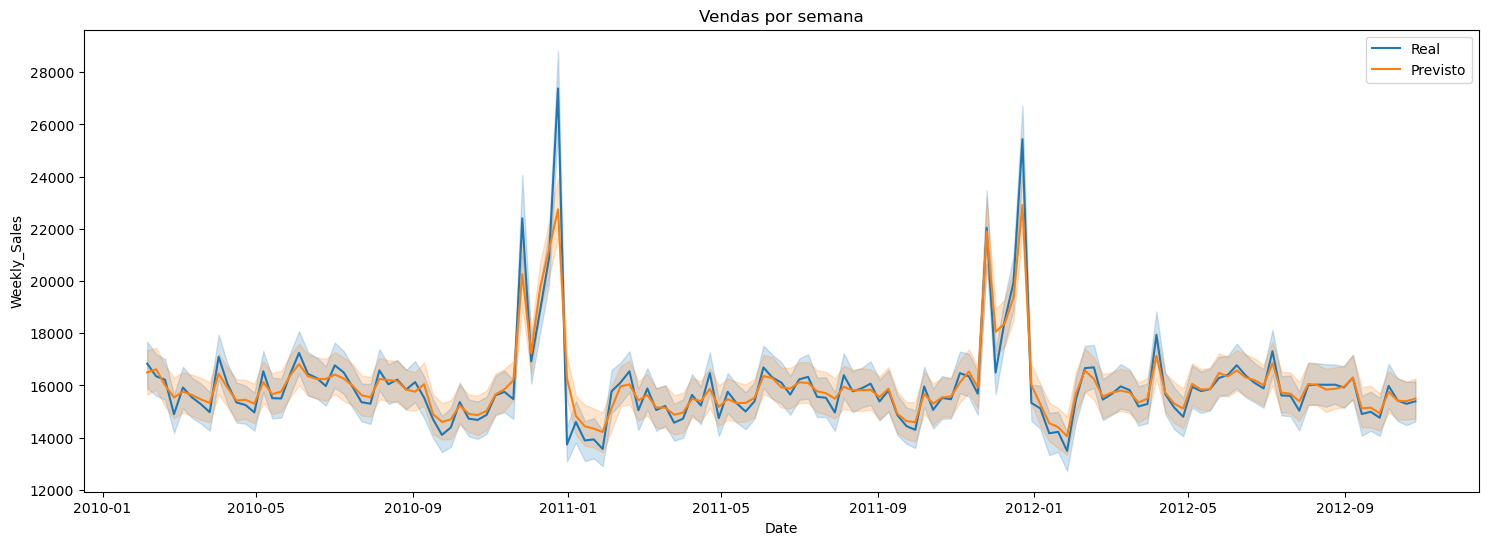

In [189]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df, x="Date", y="Weekly_Sales",label='Real')
sns.lineplot(data=df, x="Date", y="Vendas_previstas",label='Previsto')
plt.title('Vendas por semana')
plt.show()

### Apresentação da diferença entre os valores reais e preditos -  $

In [190]:
df['Diferença'] = df['Weekly_Sales'] - df['Vendas_previstas']

In [191]:
df.head()

,Date,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Vendas_previstas,Diferença
0,2010-02-05,0.63,0.43,0.05,0.00,0.00,0.00,0.00,0.00,0.84,...,0,0,0,0,0,0,0,0,26616.06,-1691.56
1,2010-02-05,0.63,0.43,0.05,0.00,0.00,0.00,0.00,0.00,0.84,...,0,0,0,0,0,0,0,0,49740.06,865.21
2,2010-02-05,0.63,0.43,0.05,0.00,0.00,0.00,0.00,0.00,0.84,...,0,0,0,0,0,0,0,0,13189.94,550.18
3,2010-02-05,0.63,0.43,0.05,0.00,0.00,0.00,0.00,0.00,0.84,...,0,0,0,0,0,0,0,0,39132.65,821.39
4,2010-02-05,0.63,0.43,0.05,0.00,0.00,0.00,0.00,0.00,0.84,...,0,0,0,0,0,0,0,0,30808.40,1420.98
